In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## Carga y exploración de datos

In [21]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

species_dict={0: "setosa", 1: "versicolor", 2: "virginica"}
df["species"] = [species_dict[i] for i in iris.target]  


df = df[df["species"] != "virginica"]  ## Eliminamos virginica solo para el ejemplo

df = df[['species','sepal length (cm)','sepal width (cm)']]
df.head()


,species,sepal length (cm),sepal width (cm)
0,setosa,5.1,3.5
1,setosa,4.9,3.0
2,setosa,4.7,3.2
3,setosa,4.6,3.1
4,setosa,5.0,3.6


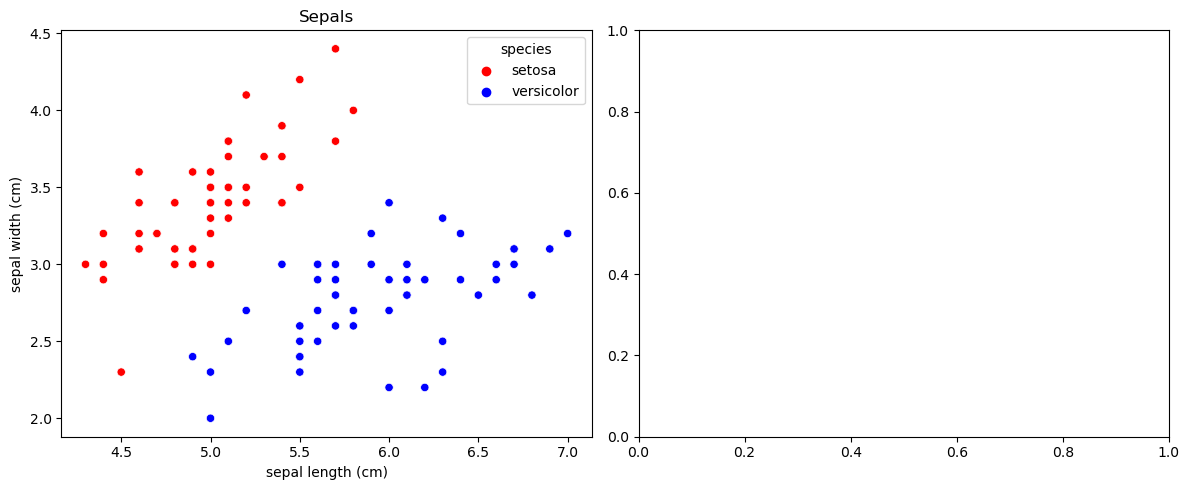

In [22]:

colors = {"setosa": "red", "versicolor": "blue"}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

## Sepal data
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", 
                hue="species", palette=colors, ax=axes[0])
axes[0].set_title("Sepals")
axes[0].set_xlabel("sepal length (cm)")
axes[0].set_ylabel("sepal width (cm)")

'''
## Petal data
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", 
                hue="species", palette=colors, ax=axes[1])
axes[1].set_title("Petals")
axes[1].set_xlabel("petal length (cm)")
axes[1].set_ylabel("petal width (cm)")

'''
plt.tight_layout()
plt.show()


## Entrenamiento del modelo

In [23]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234, stratify=df["species"])

X_train = df_train.drop(columns=["species"])
y_train = df_train["species"]
X_test = df_test.drop(columns=["species"])
y_test = df_test["species"]

In [29]:
cost= 100
svm_model = SVC(kernel="linear", C=cost, random_state=1234)
svm_model.fit(X_train, y_train)


SVC(C=100, kernel='linear', random_state=1234)

## Rendimiento del modelo

In [30]:
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



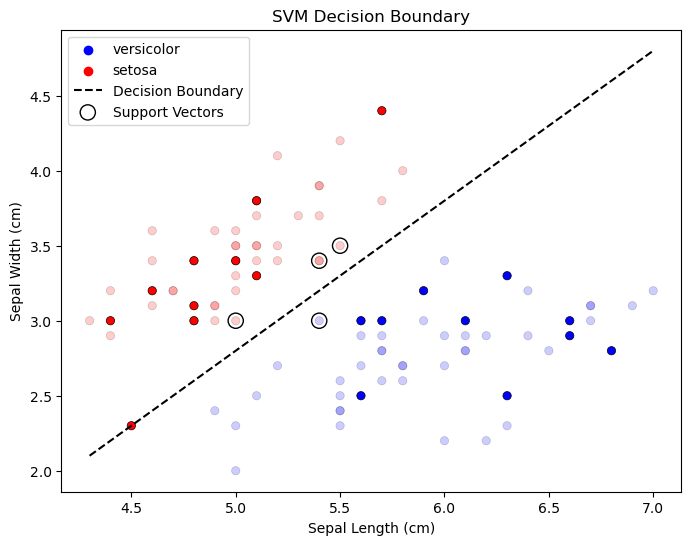

In [40]:
## Hyperplane coeffs
w = svm_model.coef_[0]  # Vector de pesos (w1, w2)
b = svm_model.intercept_[0]  # Sesgo (b)

x_vals = np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # Despejamos x2 (sepal width)

species_dict = {0: "setosa", 1: "versicolor"}
df_train["species_name"] = df_train["species"].map(species_dict)
colors = {"setosa": "red", "versicolor": "blue"}

## Plot SVM
plt.figure(figsize=(8, 6))

## Plot all datapoints
sns.scatterplot(data=df_train, x="sepal length (cm)", y="sepal width (cm)", 
                hue="species", palette=colors, edgecolor="k",alpha=0.2,legend=False)

sns.scatterplot(data=df_test, x="sepal length (cm)", y="sepal width (cm)", 
                hue="species", palette=colors, edgecolor="k")

## Plot desicion frontier
plt.plot(x_vals, y_vals, "k--", label="Decision Boundary")

## Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], 
            s=120, facecolors='none', edgecolors='k', label="Support Vectors")


plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("SVM Decision Boundary")
plt.legend()
plt.show()
